In [11]:
! pip install  numpy 
! pip install  matplotlib 
! pip install  pandas
! pip install seaborn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data_matches=pd.read_csv("wc_matches.csv")
data_players=pd.read_csv("wc_players.csv")
data_champions=pd.read_csv("wc_champions.csv")

In [14]:
print(data_matches.shape)
print(data_champions.shape)
print(data_players.shape)

(81, 10)
(98, 32)
(1190, 91)


In [15]:
teams = set(data_matches['team1'].explode().unique())
teams

{'Cloud9',
 'Clutch Gaming',
 'DAMWON Gaming',
 'DetonatioN FocusMe',
 'Flamengo eSports',
 'Fnatic',
 'FunPlus Phoenix',
 'G2 Esports',
 'GAM Esports',
 'Griffin',
 'Hong Kong Attitude',
 'Invictus Gaming',
 'Isurus',
 'J Team',
 'Lowkey Esports',
 'MAMMOTH',
 'MEGA',
 'Royal Never Give Up',
 'Royal Youth',
 'SK Telecom T1',
 'Splyce',
 'Team Liquid',
 'Unicorns Of Love',
 'ahq eSports Club'}

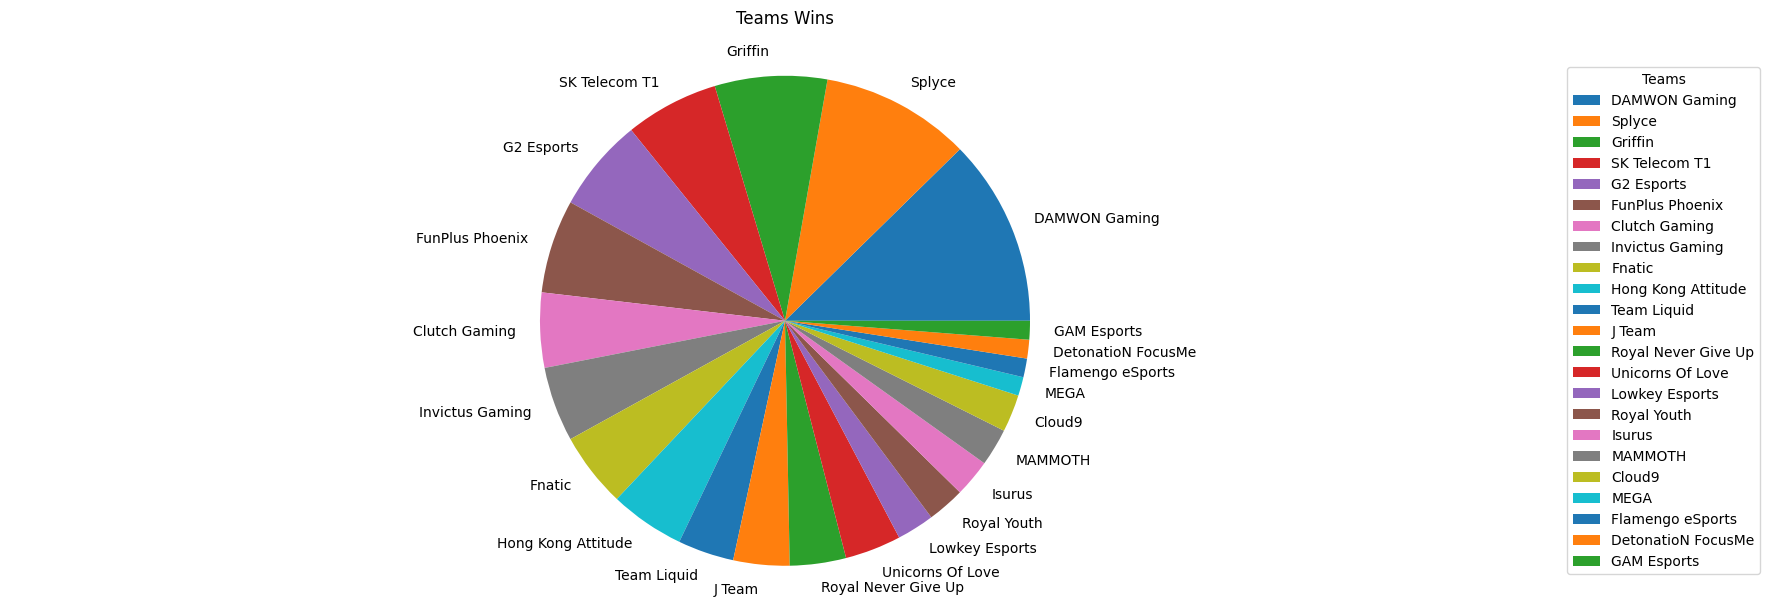

In [16]:
data_winner = data_matches['winner'].value_counts().to_frame().reset_index()
data_winner.columns = ['name', 'count']
fig, ax = plt.subplots(figsize=(20, 7), subplot_kw=dict(aspect='equal'))

wedges, texts = plt.pie(data_winner['count'], labels=data_winner['name'])

ax.set_title('Teams Wins', pad=20)
ax.legend(wedges, data_winner['name'],
          title='Teams',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

In [17]:
mvp_data = data_matches['mvp'].value_counts().to_frame().reset_index()
mvp_data.columns = ['Player', 'How many times has he been MVP?']
mvp_data.head()


,Player,How many times has he been MVP?
0,Humanoid,5
1,ShowMaker,5
2,Rookie,3
3,Huni,3
4,Tarzan,3


<Axes: xlabel='Player', ylabel='How many times has he been MVP?'>

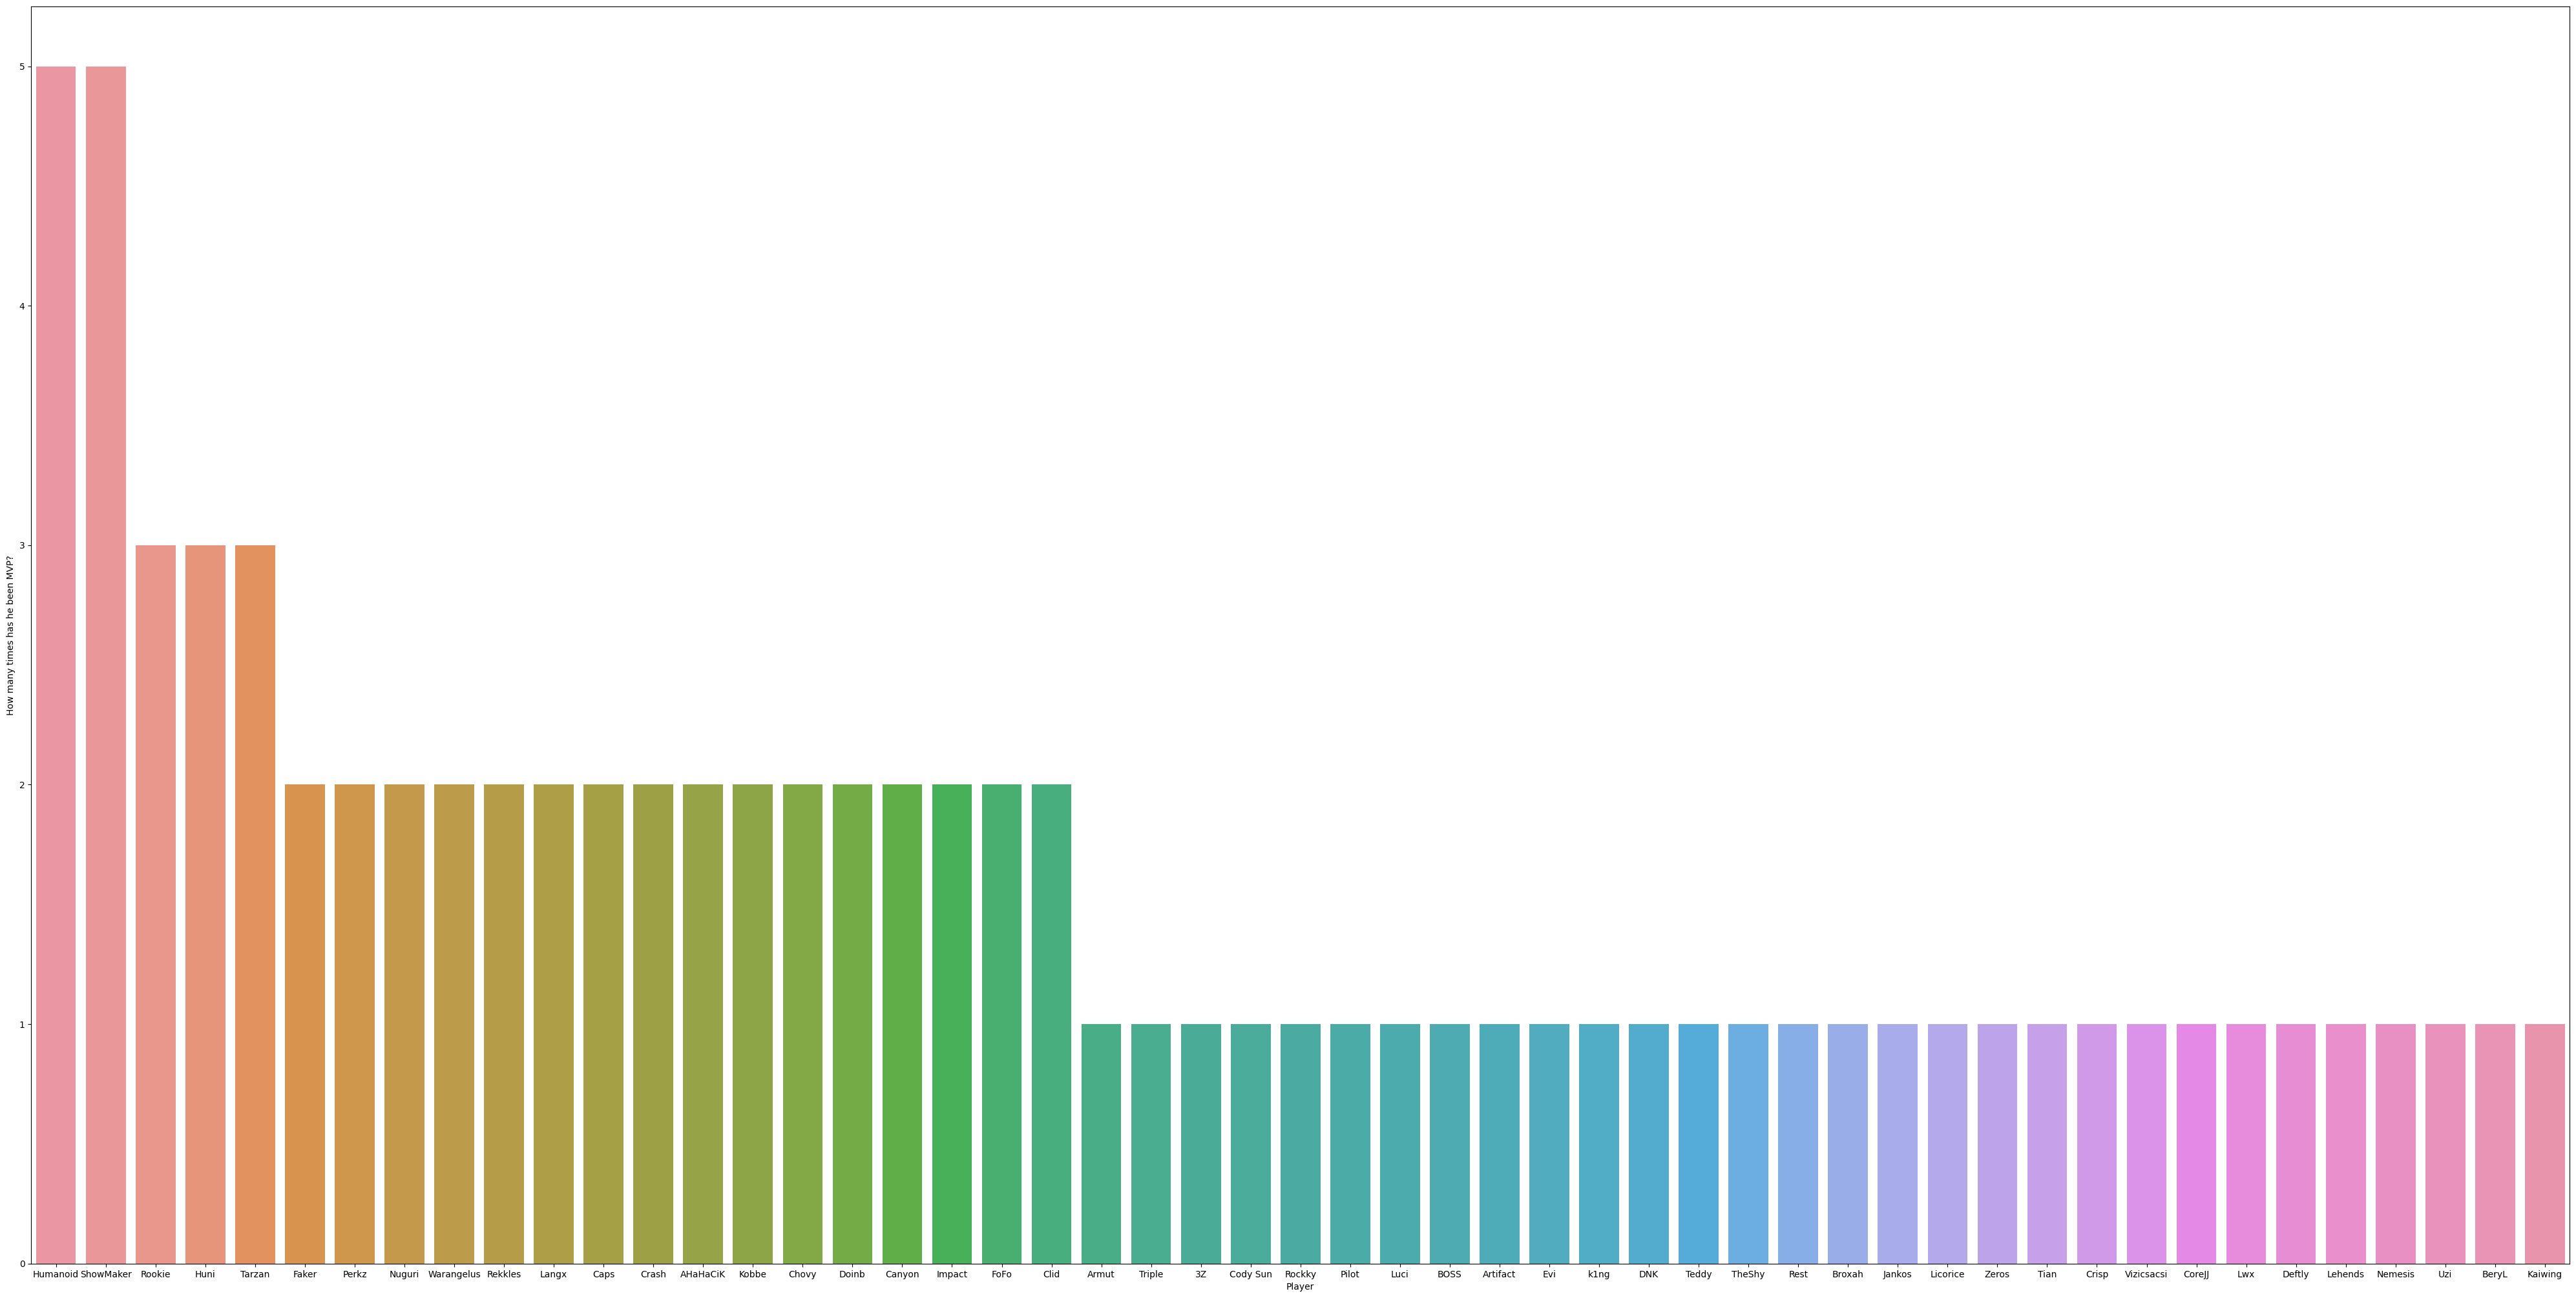

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(50.7, 25.27)
sns.barplot(data=mvp_data, x='Player', y='How many times has he been MVP?')

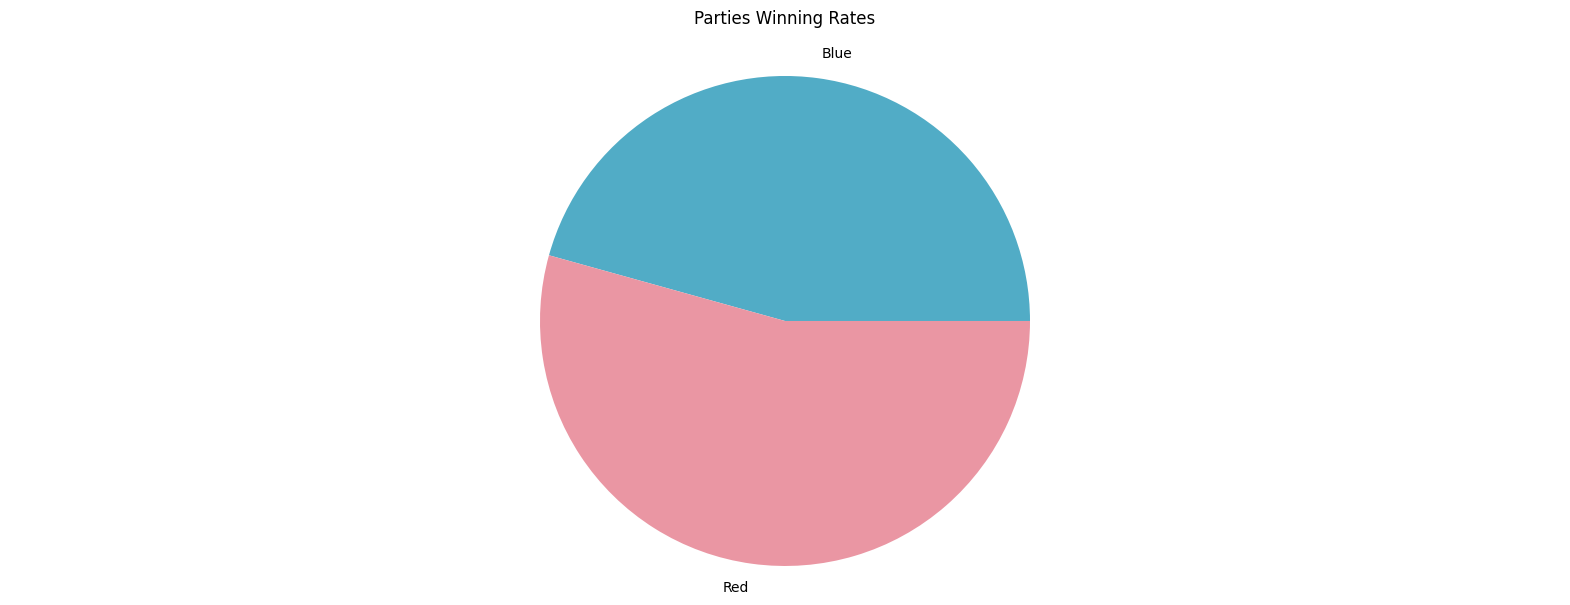

In [19]:
sides = ['Blue', 'Red']
def count_win_on_side(row):
    if (row['winner'] == row['blue']):
        return pd.Series([1, 0], sides)
    else:
        return pd.Series([0, 1], sides)

data_sides = data_matches.apply(lambda row: count_win_on_side(row), axis=1).mean()

fig, ax = plt.subplots(figsize=(20, 7), subplot_kw=dict(aspect="equal"))

colors = ['#51acc6', '#ea96a3']
plt.pie(data_sides, colors=colors, labels=sides)

ax.set_title('Parties Winning Rates', pad=20)
plt.axis('equal')
plt.show()


In [21]:
players = data_players['player'].unique()
for player in players:
    print(player)

Evi
Steal
Ceros
Yutapon
Gaeng
Vizicsacsi
Xerxe
Humanoid
Kobbe
Norskeren
Huni
Lira
Damonte
Cody Sun
Vulcan
BOSS
AHaHaCiK
Nomanz
Innaxe
Edward
Fudge
Babip
Triple
k1ng
Destiny
Buggax
Oddie
Seiya
Warangelus
Slow
Armut
Closer
Cyeol
Pilot
Tolerant
Nuguri
Canyon
ShowMaker
Nuclear
BeryL
Rockky
Lloyd
G4
DeuL
PoP
3z
Crash
M1ssion
MnM
Kaiwing
Robo
Shrimp
Goku
brTT
Luci
Hani
DNK
Artifact
Celebrity
Venus
Unified
Bwipo
Broxah
Nemesis
Rekkles
Hylissang
Khan
Clid
Faker
Teddy
Effort
Langx
Karsa
xiaohu
Uzi
Ming
TheShy
Leyan
RooKie
JackeyLove
Baolan
Ziv
Alex
Rainbow
Wako
Ysera
Impact
Xmithie
Jensen
Doublelift
CoreJJ
Rest
Hana
FoFo
Lilv
Koala
GimGoon
Tian
Doinb
Lwx
Crisp
Zeros
Levi
Kiaya
Zin
Hieu3
Sword
Tarzan
Chovy
Viper
Lehends
Wunder
Jankos
Caps
Perkz
Mikyx
Licorice
Svenskeren
Nisqy
Sneaky
Zeyzal
Slay
Blaber
Deftly
Ning
Apex
Mata


<Axes: xlabel='Player', ylabel='How many times has he been MVP?'>

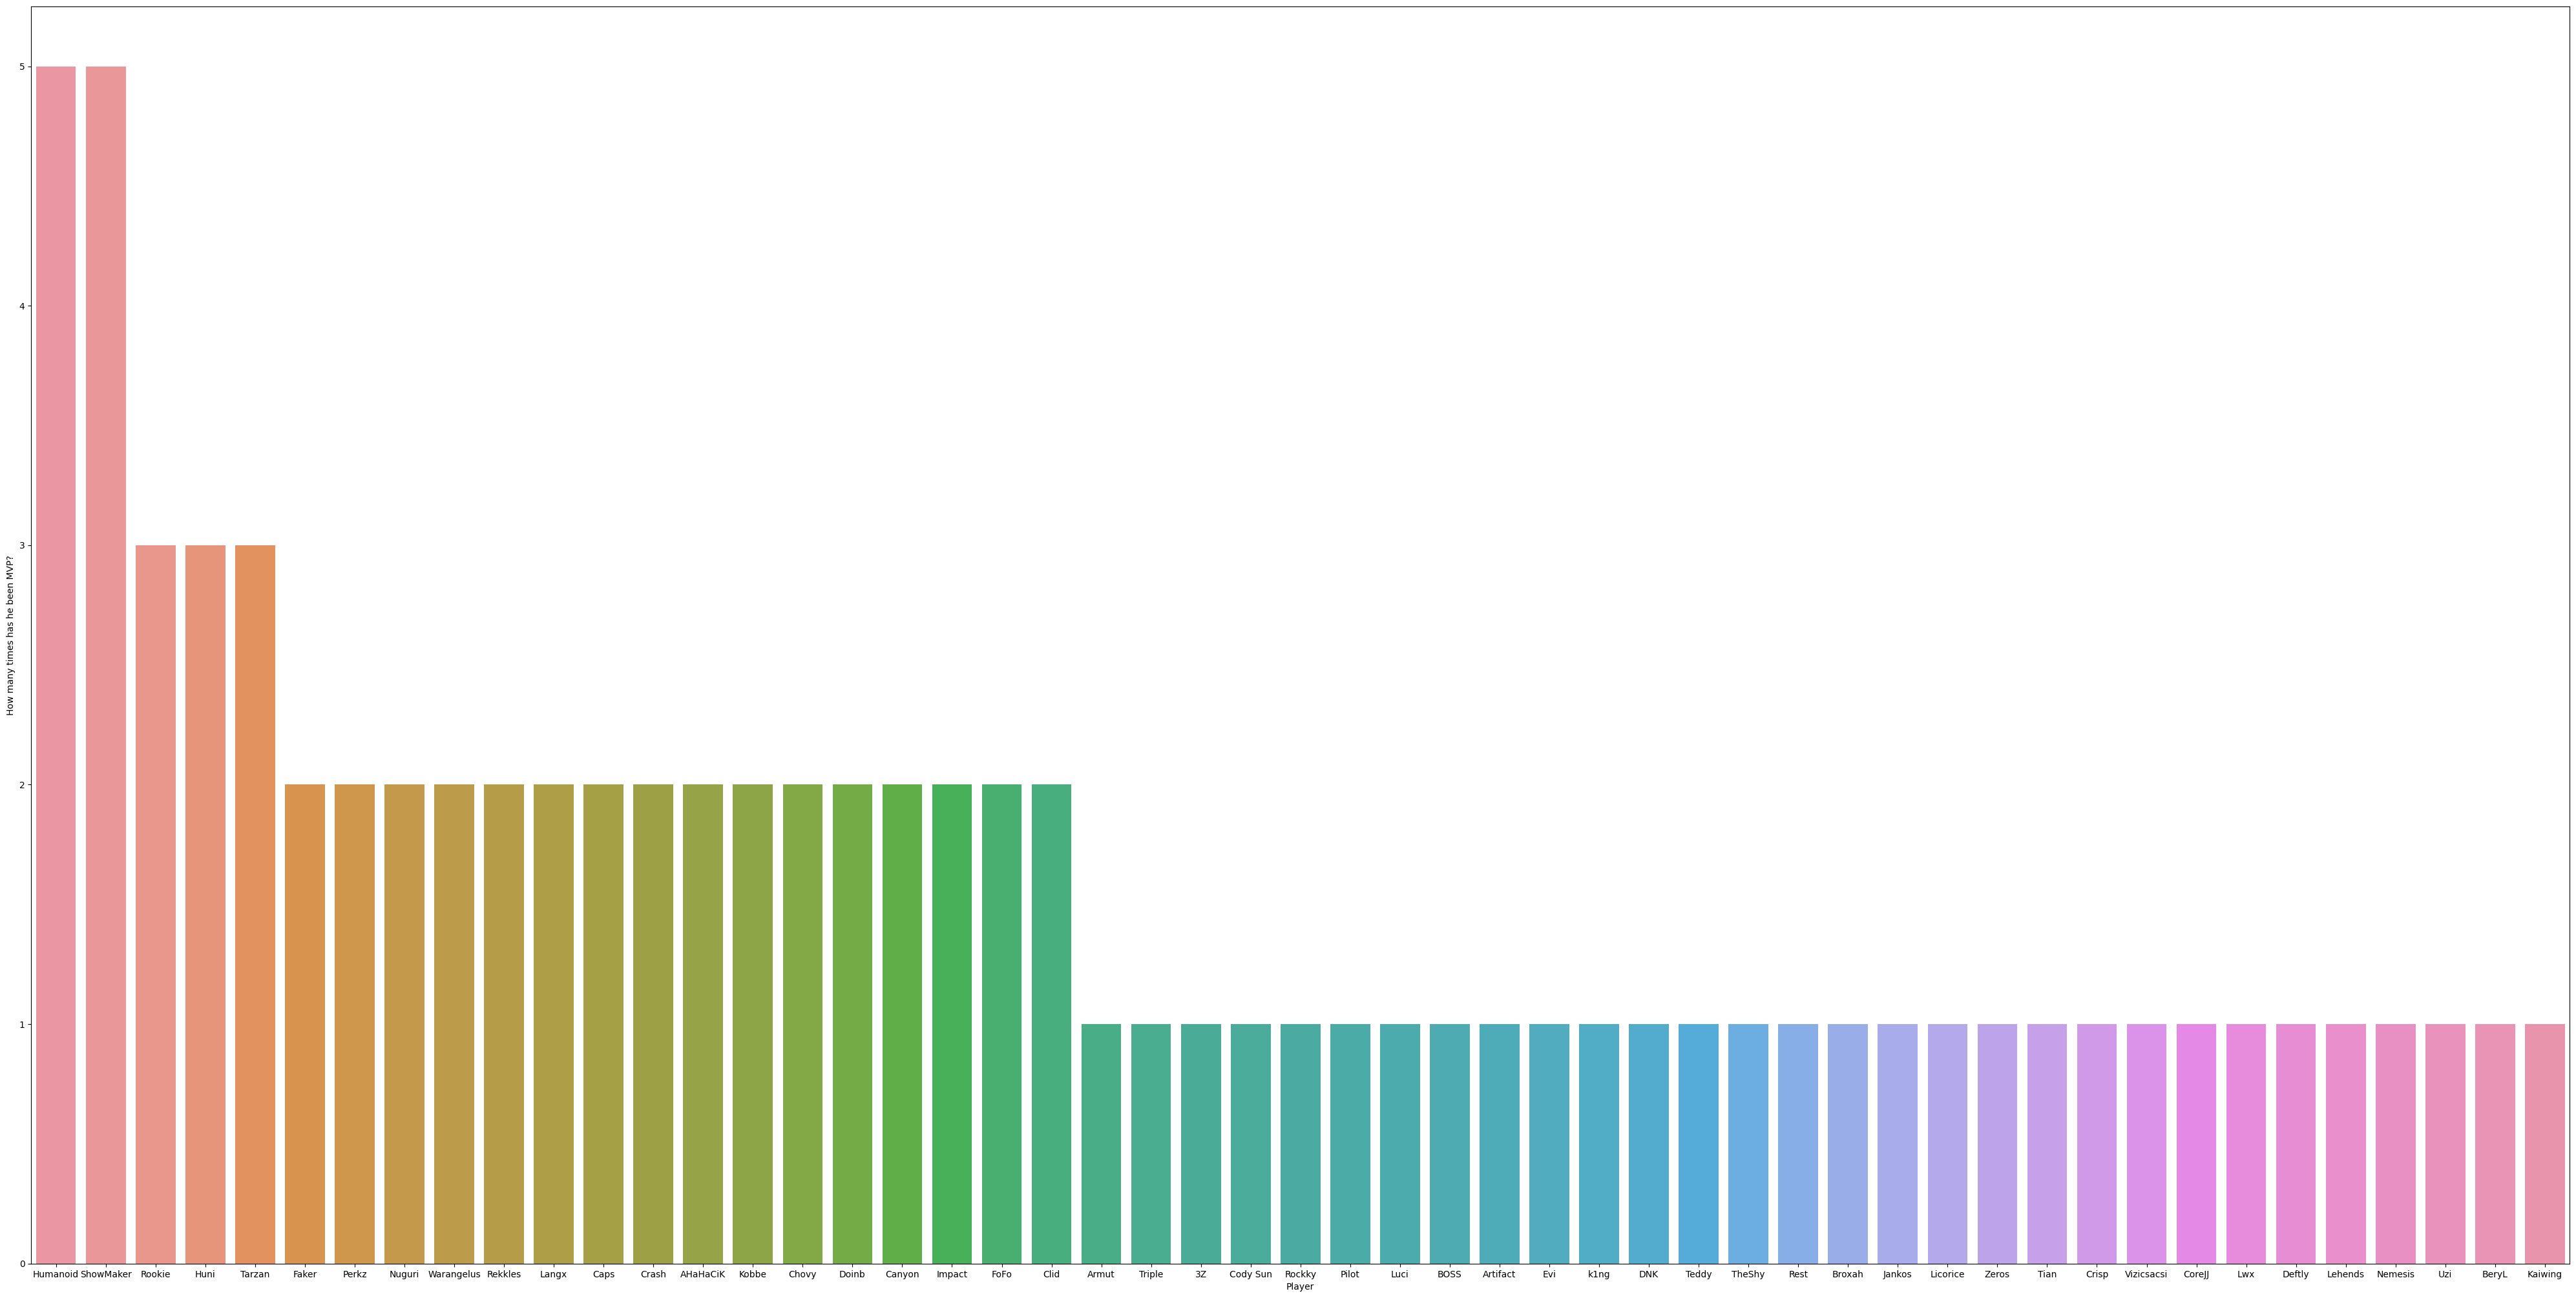

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(50.7, 25.27)
sns.barplot(data=mvp_data, x='Player', y='How many times has he been MVP?')

In [23]:
position = data_players['position'].unique()
for position in position:
    print(position)

Top
Jungle
Middle
ADC
Support


In [24]:
data_players.groupby('player')['totalgold'].mean().sort_values(ascending=False).head(15)

player
Yutapon       17411.000000
Warangelus    17312.500000
Uzi           17301.166667
DeuL          16082.000000
Kobbe         15902.900000
Buggax        15585.375000
Nomanz        15574.900000
Teddy         15395.142857
Lwx           15060.222222
k1ng          15033.400000
Rockky        14981.250000
Perkz         14971.333333
Viper         14790.545455
JackeyLove    14673.714286
Evi           14615.750000
Name: totalgold, dtype: float64

In [25]:
data_players.groupby('player')['minionkills'].mean().sort_values(ascending=False).head(15)

player
Warangelus    358.250000
DeuL          347.000000
MnM           339.000000
Uzi           334.166667
k1ng          328.000000
Yutapon       321.500000
Kobbe         307.350000
Nomanz        305.400000
Rockky        304.500000
Unified       294.538462
Doublelift    294.000000
Teddy         293.071429
Wako          290.500000
Rekkles       289.700000
Ceros         289.500000
Name: minionkills, dtype: float64

In [26]:
data_players.groupby('player')['dmgtochamps'].mean().sort_values(ascending=False).head(15)

player
Sneaky        25142.600000
Ceros         23296.750000
Buggax        22502.125000
Nomanz        21086.900000
Yutapon       20849.000000
Warangelus    20764.750000
TheShy        19489.285714
Evi           19293.500000
Huni          19283.461538
Uzi           19116.833333
FoFo          19036.833333
RooKie        17671.357143
JackeyLove    17496.928571
Humanoid      16825.150000
Khan          16708.500000
Name: dmgtochamps, dtype: float64

In [27]:
position = data_players.loc[data_players['player'] == 'Sneaky', 'position'].values[0]

print("Sneaky'nin pozisyonu:", position)

Sneaky'nin pozisyonu: ADC


In [28]:
data_players.groupby('player')['visionwards'].mean().sort_values(ascending=False).head(15)



player
Slow         23.750000
Ming         22.333333
Mata         21.000000
Baolan       19.785714
Vulcan       19.538462
Mikyx        19.166667
Koala        18.500000
BeryL        18.166667
Effort       17.666667
Crisp        16.611111
Gaeng        16.250000
Steal        16.000000
Hana         15.666667
PoP          15.500000
Norskeren    15.150000
Name: visionwards, dtype: float64

In [29]:
position = data_players.loc[data_players['player'] == 'Slow', 'position'].values[0]

print("Slow'un pozisyonu:", position)

Slow'un pozisyonu: Support


In [30]:
data_players.groupby('player')['monsterkills'].mean().sort_values(ascending=False).head()

player
Lloyd     154.500000
Oddie     148.125000
Tarzan    147.181818
Levi      143.333333
Crash     141.071429
Name: monsterkills, dtype: float64

In [31]:
position = data_players.loc[data_players['player'] == 'Lloyd', 'position'].values[0]
print("Lloyd's position:", position)


Lloyd's position: Jungle


In [34]:
position1 = data_players.loc[data_players['player'] == 'Oddie', 'position'].values[0]
print("Oddie's position:", position1)


Oddie's position: Jungle


In [35]:
position2 = data_players.loc[data_players['player'] == 'Tarzan', 'position'].values[0]
print("Tarzan's position:", position2)

Tarzan's position: Jungle


In [36]:
ban1_champions = data_players['ban1'].unique()
ban2_champions = data_players['ban2'].unique()
ban3_champions = data_players['ban3'].unique()
ban4_champions = data_players['ban4'].unique()
ban5_champions = data_players['ban5'].unique()
all_banned_champions = set().union(ban1_champions, ban2_champions, ban3_champions, ban4_champions, ban5_champions)
for champion in all_banned_champions:
    print(champion)

Veigar
Aatrox
Renekton
Gangplank
Skarner
Syndra
Tristana
Sona
Corki
nan
Irelia
Rumble
Xayah
Lee Sin
Morgana
Elise
Yuumi
Braum
Lucian
Pantheon
Neeko
Garen
Shen
Vayne
Tahm Kench
Ornn
Karma
Olaf
Draven
Cassiopeia
Fiora
Mordekaiser
Jarvan IV
Rek'Sai
Varus
Jhin
LeBlanc
Kalista
Nocturne
Orianna
Twisted Fate
Kennen
Cho'gath
Volibear
Jayce
Camille
Kai'Sa
Kayle
Jax
Nautilus
Karthus
Gragas
Quinn
Blitzcrank
Lissandra
Akali
Taliyah
Ryze
Galio
Fiddlesticks
Alistar
Ashe
Pyke
Sylas
Thresh
Gnar
Leona
Rakan
Ezreal
Yasuo
Kled
Jinx
Sivir
Caitlyn
Heimerdinger
Qiyana
Vladimir


In [37]:
ban_counts = data_players[['ban1', 'ban2', 'ban3', 'ban4', 'ban5']].stack().value_counts()

print(ban_counts)

Pantheon        590
Qiyana          430
Syndra          330
Renekton        305
Akali           270
               ... 
Sylas             5
Fiddlesticks      5
Mordekaiser       5
Corki             5
Cho'gath          5
Name: count, Length: 76, dtype: int64


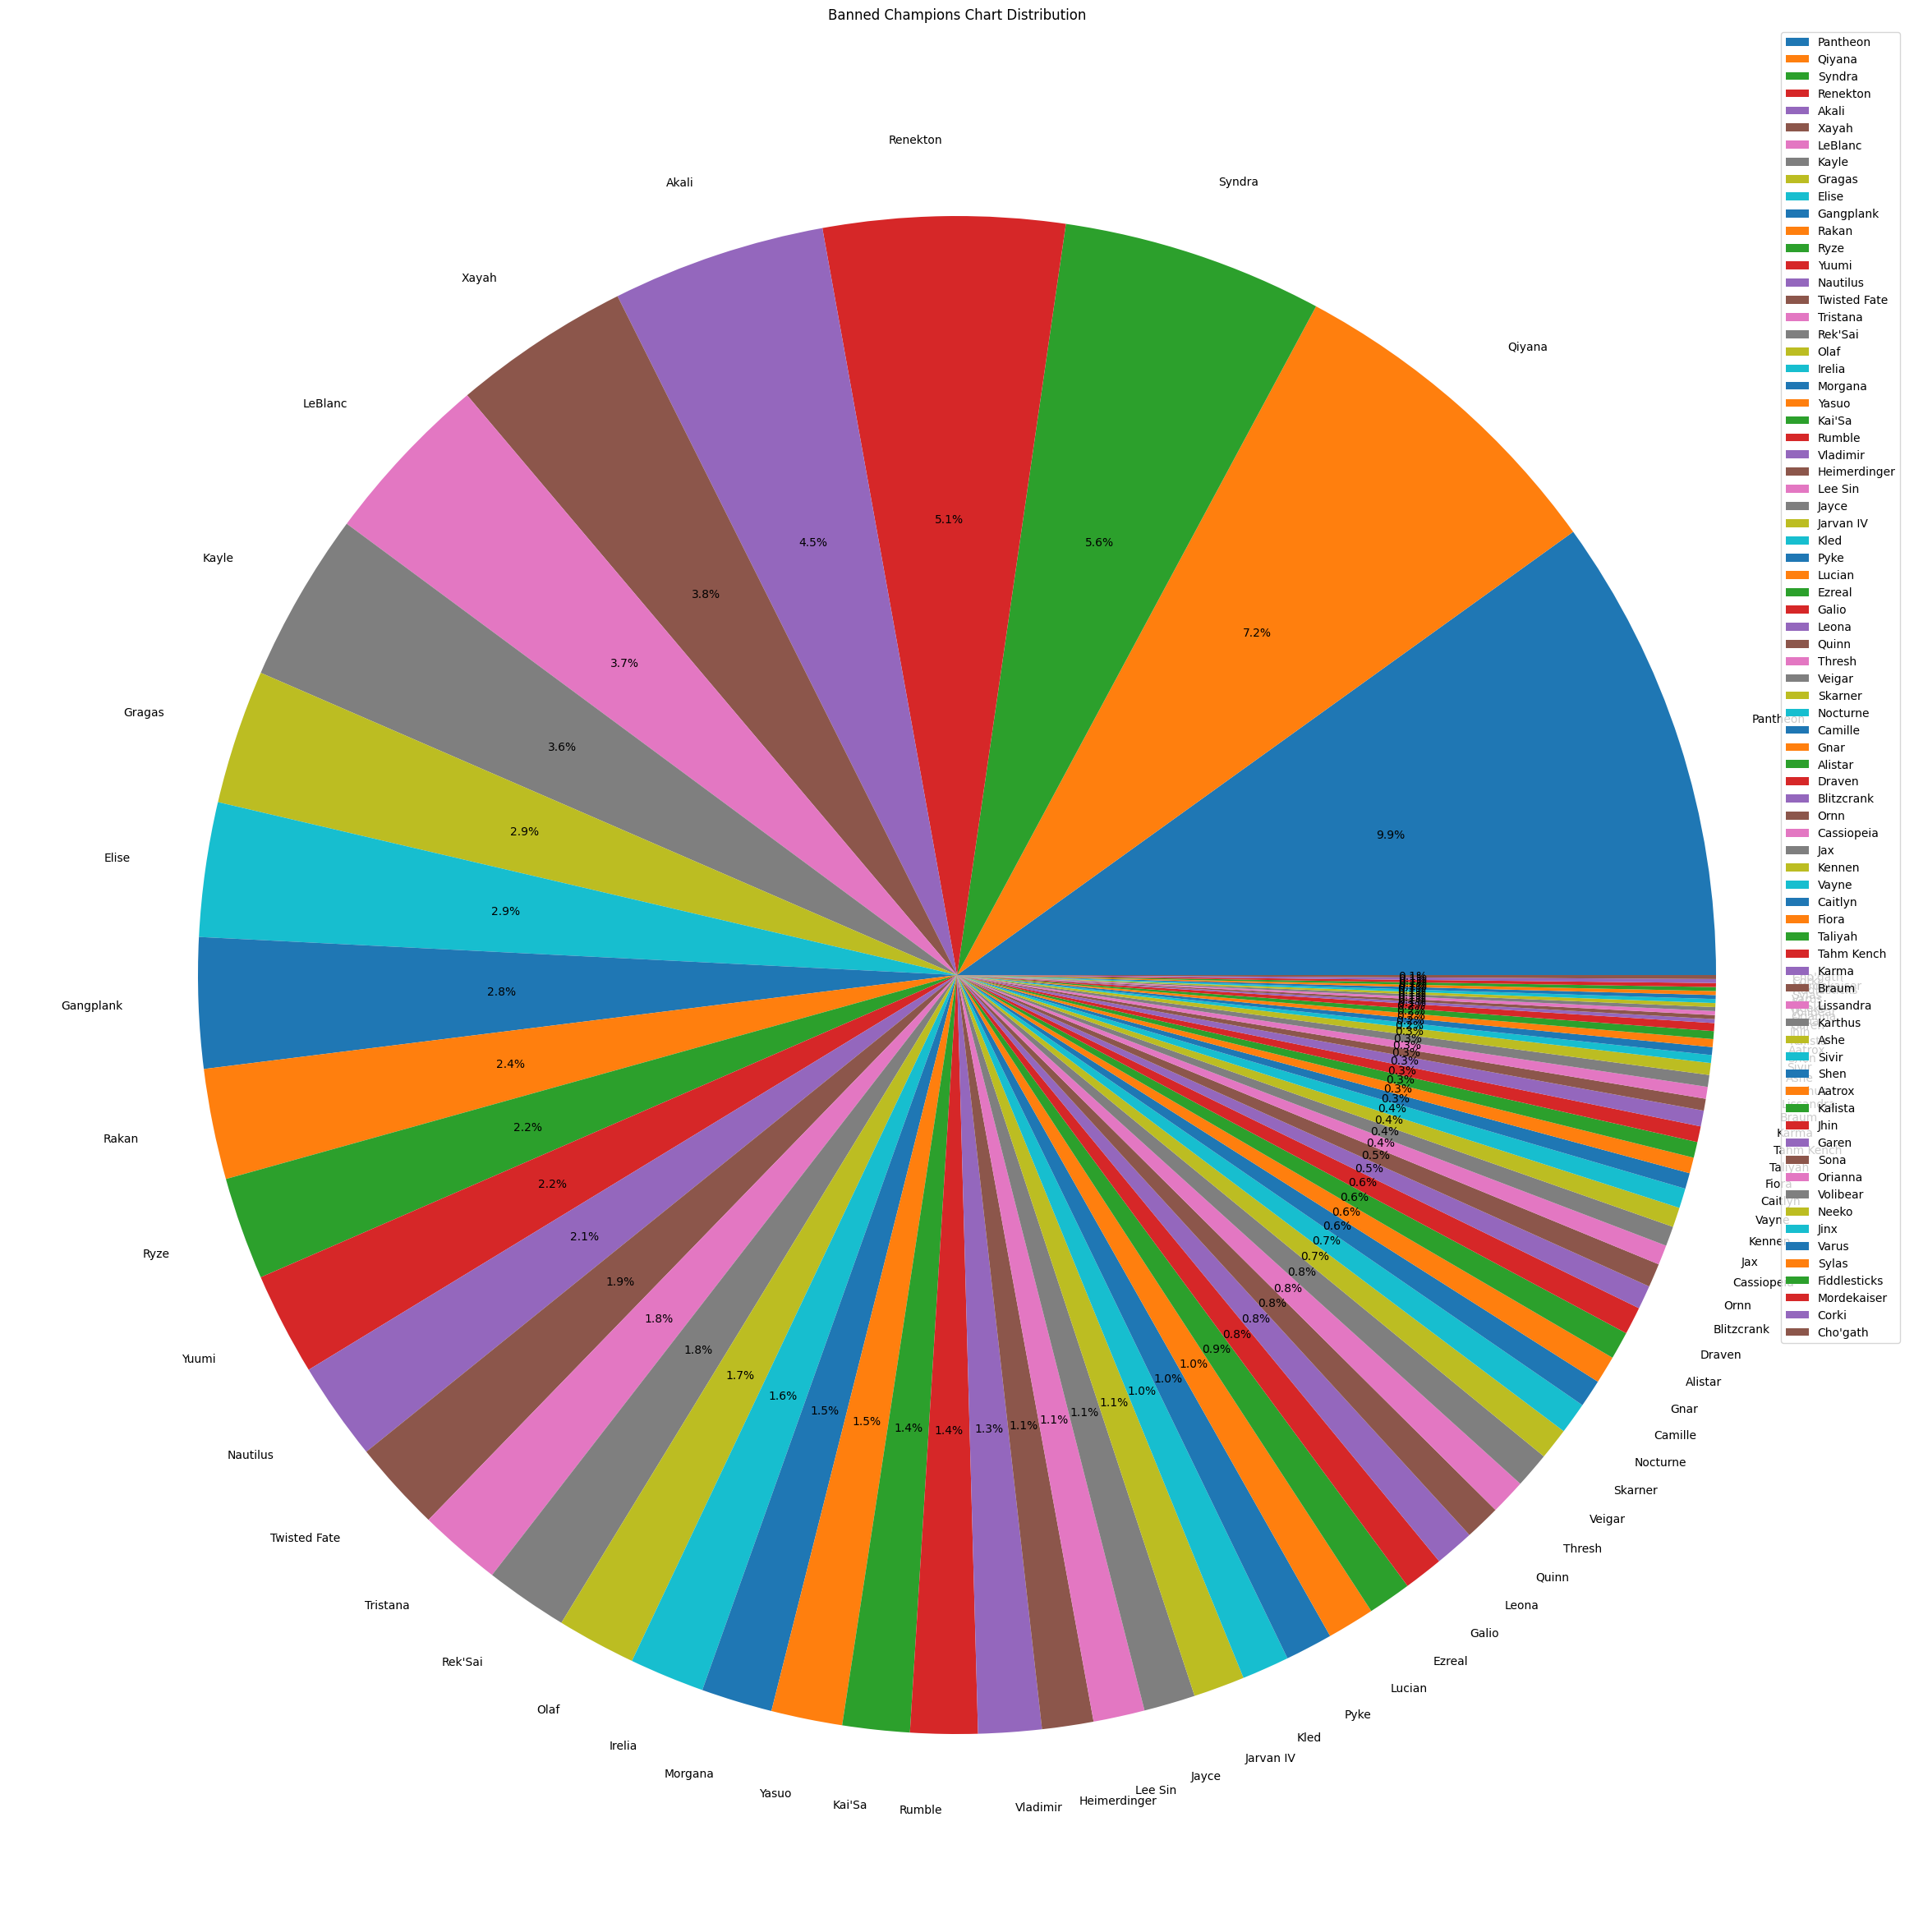

In [39]:
banned_champions = data_players[['ban1', 'ban2', 'ban3', 'ban4', 'ban5']]
banned_champions = banned_champions.stack().value_counts()

plt.figure(figsize=(50,30))
banned_champions.plot(kind='pie', autopct='%1.1f%%')
plt.title("Banned Champions Chart Distribution")
plt.ylabel('')
plt.legend()
plt.show()

In [40]:
data_matches.head()

,Unnamed: 0,team1,team2,winner,date,pbp_caster,color_caster,mvp,blue,red
0,0,Fnatic,SK Telecom T1,SK Telecom T1,2019-10-12 12:00:00,Atlus,"Froskurinn, Kobe",Faker,Fnatic,SK Telecom T1
1,1,Royal Never Give Up,Clutch Gaming,Royal Never Give Up,2019-10-12 13:00:00,Atlus,"Froskurinn, Kobe",Langx,Royal Never Give Up,Clutch Gaming
2,2,Invictus Gaming,ahq eSports Club,Invictus Gaming,2019-10-12 14:00:00,Atlus,"Froskurinn, Kobe",Rookie,Invictus Gaming,ahq eSports Club
3,3,DAMWON Gaming,Team Liquid,Team Liquid,2019-10-12 15:00:00,Phreak,"Azael, Spawn",Impact,DAMWON Gaming,Team Liquid
4,4,J Team,FunPlus Phoenix,J Team,2019-10-12 16:00:00,Phreak,"Azael, Spawn",FoFo,J Team,FunPlus Phoenix


In [41]:
Fnatic_win_matches = data_matches.loc[((data_matches['team1'] == 'Fnatic') | (data_matches['team2'] == 'Fnatic') & (data_matches['winner'] == 'Fnatic'))]
Fnatic_win_matches

,Unnamed: 0,team1,team2,winner,date,pbp_caster,color_caster,mvp,blue,red
0,0,Fnatic,SK Telecom T1,SK Telecom T1,2019-10-12 12:00:00,Atlus,"Froskurinn, Kobe",Faker,Fnatic,SK Telecom T1
7,7,Fnatic,Clutch Gaming,Fnatic,2019-10-13 13:00:00,CaptainFlowers,"Jatt, Vedius",Broxah,Fnatic,Clutch Gaming
37,37,Clutch Gaming,Fnatic,Fnatic,2019-10-19 13:00:00,Drakos,"Kobe, Vedius",Rekkles,Clutch Gaming,Fnatic
38,38,SK Telecom T1,Fnatic,Fnatic,2019-10-19 14:00:00,Drakos,"Kobe, Vedius",Nemesis,SK Telecom T1,Fnatic
41,41,Fnatic,Royal Never Give Up,Fnatic,2019-10-19 17:00:00,Quickshot,"PapaSmithy, Spawn",Rekkles,Fnatic,Royal Never Give Up


In [42]:
fnatic_players = data_players.loc[data_players['team'] == 'Fnatic', 'player'].unique()
for players in fnatic_players:
    print(players)

Bwipo
Broxah
Nemesis
Rekkles
Hylissang


In [43]:
def find_champion_team(data_matches):
    champion_team = data_matches[data_matches['winner'] == data_matches['team1']]['team2'].values[2]
    return champion_team

champion_team = find_champion_team(data_matches)
print("Champion team:", champion_team)

Champion team: FunPlus Phoenix
